In [1]:
# Parameters
job_id = "36"


#Preprocessing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import seaborn as sns

data = pd.read_csv('src/data/911.csv')
data.count()
data = data.dropna()
len(data)
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1


In [3]:
data.describe()

,lat,lng,zip,e
count,583199.000000,583199.000000,583199.000000,583199.0
mean,40.160511,-75.313874,19236.077238,1.0
std,0.109280,0.603885,298.188280,0.0
min,22.986757,-95.595595,1104.000000,1.0
25%,40.102500,-75.399590,19038.000000,1.0
50%,40.145223,-75.302575,19401.000000,1.0
75%,40.232145,-75.207070,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


In [4]:
data["zip"].nunique()

200

In [5]:
data.describe(include=["object"])

,desc,title,timeStamp,twp,addr
count,583199,583199,583199,583199,583199
unique,582993,144,566959,68,38059
top,CITY AVE & CARDINAL AVE; LOWER MERION; Statio...,Traffic: VEHICLE ACCIDENT -,2018-07-09 13:23:16,LOWER MERION,SHANNONDELL DR & SHANNONDELL BLVD
freq,5,125113,8,47487,7285


In [6]:
print('Rows     :',data.shape[0])
print('Columns  :',data.shape[1])

Rows     : 583199
Columns  : 9


In [7]:
print(data.columns.values)

['lat' 'lng' 'desc' 'zip' 'title' 'timeStamp' 'twp' 'addr' 'e']


In [8]:
data = data.drop('e',axis=1)

In [9]:
# missing values
print('Missing values:',data.isnull().values.sum())

data.isnull().sum()

Missing values: 0


lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 583199 entries, 0 to 663521
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        583199 non-null  float64
 1   lng        583199 non-null  float64
 2   desc       583199 non-null  object 
 3   zip        583199 non-null  float64
 4   title      583199 non-null  object 
 5   timeStamp  583199 non-null  object 
 6   twp        583199 non-null  object 
 7   addr       583199 non-null  object 
dtypes: float64(3), object(5)
memory usage: 40.0+ MB


In [11]:
data['zip'].nunique()

200

In [12]:
data_zip = pd.DataFrame(data['zip'].value_counts().head(5))
data_zip.rename(columns = {'zip':'Top 5'}, inplace = True)
data_zip.style.background_gradient(cmap='Blues')

,count
zip,
19401.000000,45596
19464.000000,43902
19403.000000,34888
19446.000000,32268
19406.000000,22456


In [13]:
data_twp = pd.DataFrame(data['twp'].value_counts().head(5))
data_twp.rename(columns = {'twp':'Top 5'}, inplace = True)
data_twp.style.background_gradient(cmap='Greens')

,count
twp,
LOWER MERION,47487
ABINGTON,38137
NORRISTOWN,35881
POTTSTOWN,26837
CHELTENHAM,26647


In [14]:
data['title'].nunique()

144

In [15]:
data['reason'] = data['title'].apply(lambda title: title.split(':')[0])

In [16]:
data['title_code'] = data['title'].apply(lambda title: title.split(':')[1])

In [17]:
data["weekday"] = pd.to_datetime(data['timeStamp']).dt.day_name()

In [18]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,reason,title_code,weekday
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,Thursday
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,EMS,HEAD INJURY,Thursday


In [19]:
data_class = data

In [20]:
data.describe(include=["object"])

,desc,title,timeStamp,twp,addr,reason,title_code,weekday
count,583199,583199,583199,583199,583199,583199,583199,583199
unique,582993,144,566959,68,38059,3,93,7
top,CITY AVE & CARDINAL AVE; LOWER MERION; Statio...,Traffic: VEHICLE ACCIDENT -,2018-07-09 13:23:16,LOWER MERION,SHANNONDELL DR & SHANNONDELL BLVD,EMS,VEHICLE ACCIDENT -,Friday
freq,5,125113,8,47487,7285,304785,125113,90328


# Remove Outliers

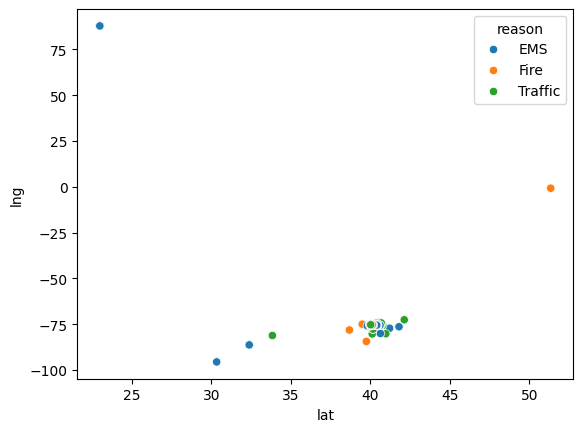

In [21]:
import seaborn as sns

sns.scatterplot(x=data['lat'],y=data['lng'], hue=data['reason']);

In [22]:
data = data[(data["lat"] > 39.5) & (data["lat"] <41.0) ]
data = data[(data["lng"] > -77.0)]

In [23]:
import os

sns.scatterplot(x=data['lat'],y=data['lng'], hue=data['reason']);

images_dir = f"src/output/{job_id}/images"
os.makedirs(images_dir, exist_ok=True)
results_dir = f"src/output/{job_id}/results"
os.makedirs(results_dir, exist_ok=True)

plt.savefig(f"{images_dir}/1.png", bbox_inches='tight')
plt.close()

In [24]:
data = data[data["lng"] > -77]
data = data[data["lng"] < -25]

# Visualizations

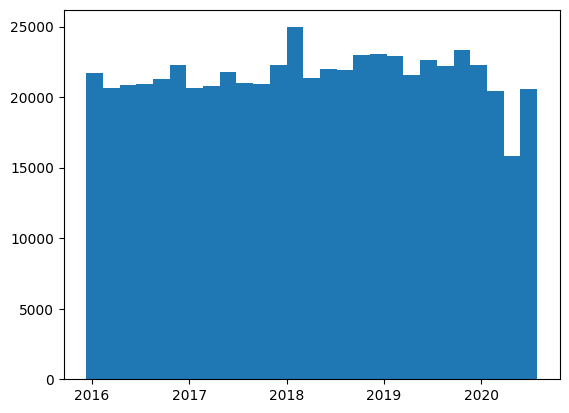

In [25]:
# Histogram by half year
import datetime as dt

plt.hist(pd.to_datetime(data['timeStamp']).dt.date, bins = 27);

In [26]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))

sns.countplot(x='reason', data=data, order=data['reason'].value_counts().index, ax=axes[0])
axes[0].set_title('Common Reasons for 911 Calls', size=13)
axes[0].set(xlabel='Reason', ylabel='Count')

data['reason'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[1])
axes[1].set(xlabel='', ylabel='')

sns.despine(bottom=False, left=True)
plt.savefig(f"{images_dir}/2.png", bbox_inches='tight')

plt.close()

In [27]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.countplot(y='title', data=data, order=data['title'].value_counts().index, palette='prism')
sns.despine(bottom=False, left=True)
axes.set_ylim([9, 0])
axes.set_title('Count of Descriptions for 911 Calls', size=15)
axes.set(xlabel='Number of 911 Calls', ylabel='')
plt.tight_layout()
# Save the figure
plt.savefig(f"{images_dir}/3.png", bbox_inches='tight')

# Close the plot to free memory (especially in scripts or notebooks)
plt.close()

/var/folders/h2/rxk5gqjs5d189kgkrnjvdc8m0000gn/T/ipykernel_21458/1568977134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='title', data=data, order=data['title'].value_counts().index, palette='prism')


In [28]:
data[data['reason']=='Traffic'].groupby('title_code').count()['lat'].sort_values(ascending=True).plot(kind='barh', figsize=(10, 5), color='darkblue')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('Traffic 911 Emergency Calls', fontsize=15)
plt.savefig(f"{images_dir}/4.png", bbox_inches='tight')
plt.close()

In [29]:
data[data['reason']=='Fire'].groupby('title_code').count()['lat'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10, 5), color='darkred')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('Fire 911 Emergency Calls', fontsize=15)
plt.savefig(f"{images_dir}/5.png", bbox_inches='tight')
plt.close()

In [30]:
data[data['reason']=='EMS'].groupby('title_code').count()['lat'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10, 5), color='darkgreen')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('EMS 911 Emergency Calls', fontsize=15)
plt.savefig(f"{images_dir}/6.png", bbox_inches='tight')
plt.close()

# Sample Maps

In [31]:
#import folium

In [32]:
# Create and center Folium map
#folium_map = folium.Map(location=[40.102500,	-75.399590],
                        #tiles="OpenStreetMap")

# Plot Points
#for index, row in data.iterrows():
#    radius_len = 1

#    folium.CircleMarker(location = (row['lat'],
#                                   row['lng']),
#                      radius = radius_len,
#                       fill = True).add_to(folium_map)

#folium_map


In [33]:
#from folium import plugins
#from folium.plugins import HeatMap

In [34]:
#map_hooray = folium.Map(location=[40.102500,	-75.399590],)

#heat_df = data.head(10000) # Reducing data size so it runs faster
#heat_df = heat_df[['lat', 'lng']]

# List comprehension to make out list of lists
#heat_data = [[row['lat'],row['lng']] for index, row in heat_df.iterrows()]

# Plot it on the map
#HeatMap(heat_data).add_to(map_hooray)

# Display the map
#map_hooray

In [35]:
#map_hooray = folium.Map(location=[40.102500,	-75.399590],)

# Plot Points
#for index, row in data.head(50000).iterrows():
#    radius_len = 1

    # color = row["property_type"]
#    if row["reason"] == "EMS":
#        color = ["red"]
#    elif row["reason"] == "Fire":
#        color = ["blue"]
#    elif row["reason"] == "Traffic":
#        color = ["green"]

#    folium.CircleMarker(location = (row['lat'],
#                                   row['lng']),
#                       radius = radius_len,
#                       color = color,
#                       fill = True).add_to(folium_map)

#folium_map


# Feature Engineering (Longitude, Latitude)

Lat Long

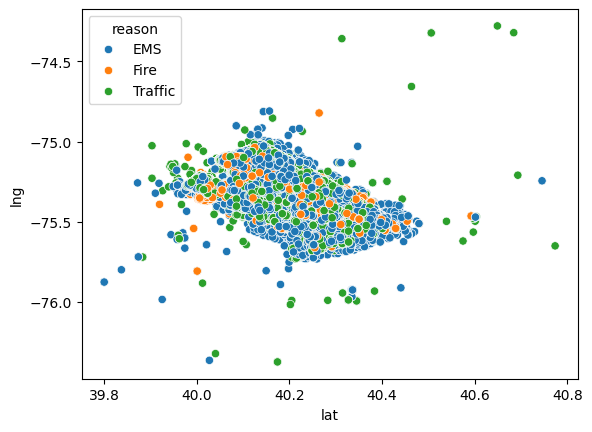

In [36]:
# Plot data
sns.scatterplot(x=data['lat'],y=data['lng'], hue=data['reason']);

In [37]:
import sklearn.cluster
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data[["lat","lng"]])
    Sum_of_squared_distances.append(km.inertia_)

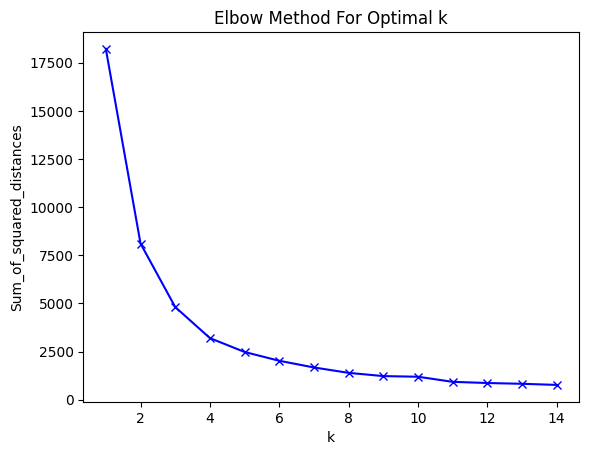

In [38]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [39]:
# Select K = 5
km = KMeans(n_clusters= 5)
km.fit(data[["lat","lng"]])
clusters = km.predict(data[["lat","lng"]])

In [40]:
data["cluster"] = pd.Series(clusters, index=data.index)


In [41]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,reason,title_code,weekday,cluster
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,Thursday,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,Thursday,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,Thursday,2
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,Thursday,2
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,EMS,HEAD INJURY,Thursday,3


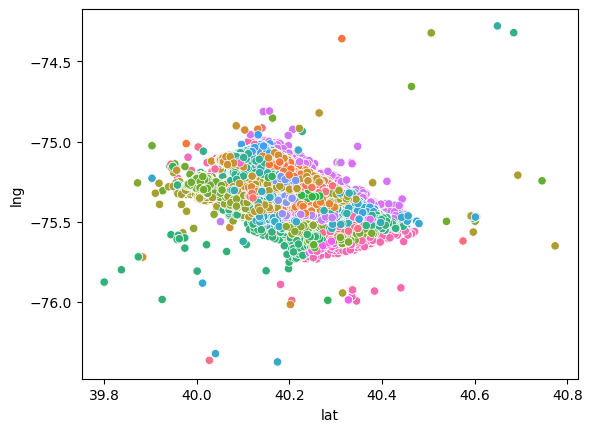

In [42]:
sns.scatterplot(x=data['lat'],y=data['lng'], hue=data['twp'], legend=False);

In [43]:
# Plot clusters
sns.scatterplot(x=data['lat'],y=data['lng'], hue=data['cluster']);
plt.savefig(f"{images_dir}/7.png", bbox_inches='tight')
plt.close()

#Time of Day

In [44]:
data["time"] = data['timeStamp'].str[-8:]

In [45]:
data['secs_into_day'] = (pd.to_datetime(data['timeStamp']) - pd.to_datetime(data['timeStamp']).dt.floor('d')).dt.total_seconds()

In [46]:
data['secs_into_day']

0         61852.0
1         62961.0
2         52761.0
3         60456.0
5         56344.0
           ...   
663517    56811.0
663518    57139.0
663519    57172.0
663520    57248.0
663521    57166.0
Name: secs_into_day, Length: 583163, dtype: float64

In [47]:
time_hist = plt.hist(data['secs_into_day'], bins=96);
time_hist_pts = np.array(data['secs_into_day'].to_list())
plt.xlabel('Seconds into Day')
plt.ylabel('Calls per 15 minute intervals')
plt.title('Total count of Calls by Time')
time_hist;
np.argmax(time_hist_pts[:-1] - time_hist_pts[1:])
plt.savefig(f"{images_dir}/8.png", bbox_inches='tight')
plt.close()

In [48]:
def max_difference_to_neighbors(numbers):
    max_difference = 0
    max_difference_index = None
    for i in range(1, len(numbers) - 1):
        difference_left = abs(numbers[i] - numbers[i-1])
        difference_right = abs(numbers[i] - numbers[i+1])
        if difference_left > max_difference and difference_left > difference_right:
            max_difference = difference_left
            max_difference_index = i
        elif difference_right > max_difference and difference_right > difference_left:
            max_difference = difference_right
            max_difference_index = i
    return max_difference_index, max_difference

In [49]:
max_difference_to_neighbors(time_hist_pts)

(451500, 86383.0)

In [50]:
# seconnds into day to make first split
secs = 86400/96*28
str(dt.timedelta(seconds=secs))

# Therfore shift times to 7am

'7:00:00'

In [51]:
threshold = secs
increment = 86400

# Update column secs_into_day if the value is less than the 7am
data['secs_into_day'] = data['secs_into_day'].apply(lambda x: x + increment if x < threshold else x)


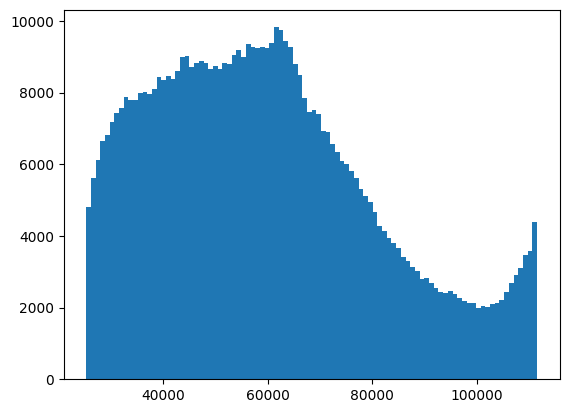

In [52]:
time_hist = plt.hist(data['secs_into_day'], bins=96);

In [53]:
import sklearn.cluster
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data["secs_into_day"].values.reshape(-1, 1))
    Sum_of_squared_distances.append(km.inertia_)

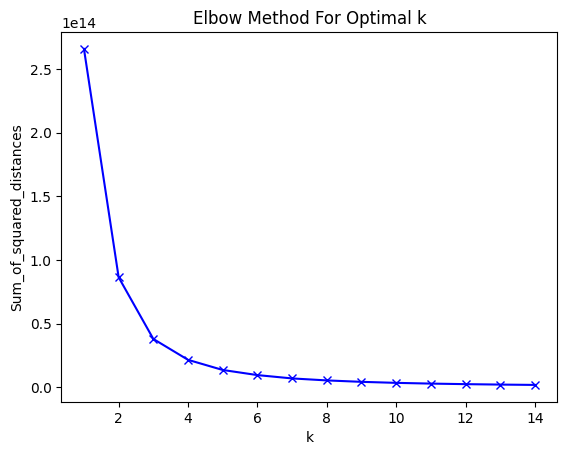

In [54]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [55]:
# Select K = 4
km = KMeans(n_clusters= 4)
km.fit(data[["secs_into_day"]])
clusters_day = km.predict(data[["secs_into_day"]])

In [56]:
data["cluster_time"] = clusters_day

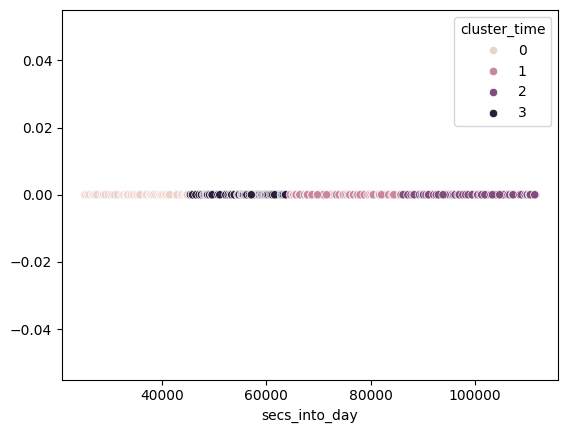

In [57]:
sns.scatterplot(x=data['secs_into_day'],y=0, hue=data['cluster_time']);

In [58]:
from sklearn import cluster
print("time cluster 0: ~6pm-12am midnight")
print(dt.timedelta(seconds = data[data["cluster_time"] == 0]["secs_into_day"].min()))
print(dt.timedelta(seconds = data[data["cluster_time"] == 0]["secs_into_day"].max()))

print("time cluster 1: 7am-1pm")
print(dt.timedelta(seconds = data[data["cluster_time"] == 1]["secs_into_day"].min()))
print(dt.timedelta(seconds = data[data["cluster_time"] == 1]["secs_into_day"].max()))

print("time cluster 2: 12am midnight -7am")
print(dt.timedelta(seconds = data[data["cluster_time"] == 2]["secs_into_day"].min()))
print(dt.timedelta(seconds = data[data["cluster_time"] == 2]["secs_into_day"].max()))

print("time cluster 3: 1pm-6pm")
print(dt.timedelta(seconds = data[data["cluster_time"] == 3]["secs_into_day"].min()))
print(dt.timedelta(seconds = data[data["cluster_time"] == 3]["secs_into_day"].max()))

dt.timedelta(seconds = data[data["cluster_time"] == 0]["secs_into_day"].max()) - dt.timedelta(seconds = data[data["cluster_time"] == 0]["secs_into_day"].min())

time cluster 0: ~6pm-12am midnight
7:00:00
12:35:23
time cluster 1: 7am-1pm
17:45:38
23:54:48
time cluster 2: 12am midnight -7am
23:54:49
1 day, 6:59:59
time cluster 3: 1pm-6pm
12:35:24
17:45:37


datetime.timedelta(seconds=20123)

In [59]:
data["cluster_time"] = data['cluster_time'].map({0:'evening', 1:'morning', 2: 'midnight', 3: 'afternoon'})
data.groupby('cluster_time').count()['lat'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10, 5), color='darkgreen')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('EMS 911 Emergency Calls', fontsize=15)
plt.savefig(f"{images_dir}/9.png", bbox_inches='tight')
plt.close()

#Method 2:

#ECLAT ASSOCIATION RULE

In [60]:
data["cluster"]

0         1
1         3
2         2
3         2
5         3
         ..
663517    2
663518    2
663519    4
663520    2
663521    4
Name: cluster, Length: 583163, dtype: int32

In [61]:
test = data[["reason", "weekday","cluster", "cluster_time"]].applymap(str)
test1 = test.values.tolist()
test1

test2 = pd.DataFrame(test1)
test2

/var/folders/h2/rxk5gqjs5d189kgkrnjvdc8m0000gn/T/ipykernel_21458/3123675670.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test = data[["reason", "weekday","cluster", "cluster_time"]].applymap(str)


,0,1,2,3
0,EMS,Thursday,1,afternoon
1,EMS,Thursday,3,afternoon
2,Fire,Thursday,2,afternoon
3,EMS,Thursday,2,afternoon
4,EMS,Thursday,3,afternoon
...,...,...,...,...
583158,Traffic,Wednesday,2,afternoon
583159,EMS,Wednesday,2,afternoon
583160,EMS,Wednesday,4,afternoon
583161,Fire,Wednesday,2,afternoon


In [62]:
# we are looking for itemSETS
# we do not want to have any individual products returned
min_n_products = 2

# we want to set min support to 7
# but we have to express it as a percentage
min_support = 0.01

# we have no limit on the size of association rules
# so we set it to the longest transaction
max_length = max([len(x) for x in test1])

In [63]:
from pyECLAT import ECLAT
import json

# create an instance of eclat
my_eclat = ECLAT(data=test2, verbose=True)

# fit the algorithm
rule_indices, rule_supports = my_eclat.fit(min_support=min_support,
                                           min_combination=min_n_products,
                                           max_combination=max_length)
with open(f"{results_dir}/eclat.json", 'w') as json_file:
    json.dump(rule_supports, json_file)

  0%|          | 0/19 [00:00<?, ?it/s]

 11%|█         | 2/19 [00:00<00:00, 18.82it/s]

 21%|██        | 4/19 [00:00<00:00, 18.35it/s]

 32%|███▏      | 6/19 [00:00<00:00, 18.71it/s]

 42%|████▏     | 8/19 [00:00<00:00, 18.74it/s]

 53%|█████▎    | 10/19 [00:00<00:00, 17.87it/s]

 63%|██████▎   | 12/19 [00:00<00:00, 18.22it/s]

 79%|███████▉  | 15/19 [00:00<00:00, 18.93it/s]

 89%|████████▉ | 17/19 [00:00<00:00, 18.74it/s]

100%|██████████| 19/19 [00:01<00:00, 18.86it/s]

100%|██████████| 19/19 [00:01<00:00, 18.65it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

100%|██████████| 19/19 [00:00<00:00, 201.74it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

100%|██████████| 19/19 [00:00<00:00, 271.01it/s]

Combination 2 by 2


0it [00:00, ?it/s]

19it [00:00, 186.57it/s]

38it [00:00, 169.67it/s]

56it [00:00, 125.80it/s]

70it [00:00, 122.12it/s]

87it [00:00, 135.19it/s]

102it [00:00, 130.11it/s]

116it [00:00, 129.95it/s]

130it [00:01, 119.69it/s]

143it [00:01, 121.75it/s]

165it [00:01, 146.10it/s]

171it [00:01, 136.15it/s]

Combination 3 by 3


0it [00:00, ?it/s]

44it [00:00, 432.96it/s]

88it [00:00, 399.16it/s]

129it [00:00, 361.51it/s]

170it [00:00, 377.32it/s]

209it [00:00, 354.09it/s]

245it [00:00, 335.65it/s]

279it [00:00, 326.22it/s]

312it [00:00, 316.93it/s]

349it [00:01, 331.45it/s]

383it [00:01, 304.15it/s]

416it [00:01, 308.27it/s]

448it [00:01, 288.15it/s]

478it [00:01, 276.16it/s]

514it [00:01, 298.24it/s]

551it [00:01, 316.30it/s]

584it [00:01, 313.87it/s]

627it [00:01, 345.63it/s]

662it [00:02, 286.80it/s]

693it [00:02, 284.07it/s]

728it [00:02, 301.15it/s]

763it [00:02, 310.21it/s]

798it [00:02, 319.74it/s]

831it [00:02, 296.16it/s]

862it [00:02, 299.24it/s]

893it [00:02, 283.95it/s]

931it [00:02, 308.55it/s]

969it [00:03, 317.72it/s]

Combination 4 by 4


0it [00:00, ?it/s]

42it [00:00, 419.99it/s]

84it [00:00, 394.88it/s]

124it [00:00, 389.71it/s]

165it [00:00, 396.98it/s]

206it [00:00, 400.10it/s]

247it [00:00, 394.48it/s]

287it [00:00, 394.03it/s]

327it [00:00, 385.27it/s]

368it [00:00, 391.11it/s]

408it [00:01, 389.94it/s]

448it [00:01, 388.68it/s]

487it [00:01, 385.62it/s]

528it [00:01, 391.03it/s]

570it [00:01, 398.93it/s]

612it [00:01, 404.08it/s]

653it [00:01, 403.76it/s]

694it [00:01, 392.61it/s]

735it [00:01, 397.12it/s]

777it [00:01, 401.90it/s]

818it [00:02, 403.65it/s]

859it [00:02, 388.46it/s]

898it [00:02, 384.96it/s]

940it [00:02, 394.34it/s]

980it [00:02, 390.86it/s]

1020it [00:02, 386.92it/s]

1059it [00:02, 380.91it/s]

1098it [00:02, 379.65it/s]

1137it [00:02, 380.89it/s]

1177it [00:03, 386.12it/s]

1216it [00:03, 383.56it/s]

1255it [00:03, 376.99it/s]

1293it [00:03, 374.85it/s]

1331it [00:03, 375.02it/s]

1373it [00:03, 388.21it/s]

1413it [00:03, 390.04it/s]

1453it [00:03, 388.62it/s]

1493it [00:03, 389.58it/s]

1535it [00:03, 396.15it/s]

1578it [00:04, 405.49it/s]

1619it [00:04, 404.60it/s]

1660it [00:04, 401.41it/s]

1701it [00:04, 399.01it/s]

1742it [00:04, 401.45it/s]

1783it [00:04, 399.89it/s]

1823it [00:04, 396.93it/s]

1866it [00:04, 404.67it/s]

1908it [00:04, 406.36it/s]

1949it [00:04, 404.54it/s]

1990it [00:05, 401.75it/s]

2031it [00:05, 401.03it/s]

2072it [00:05, 401.14it/s]

2113it [00:05, 388.88it/s]

2152it [00:05, 385.81it/s]

2191it [00:05, 380.71it/s]

2230it [00:05, 376.49it/s]

2268it [00:05, 377.25it/s]

2306it [00:05, 374.09it/s]

2344it [00:05, 374.07it/s]

2385it [00:06, 384.08it/s]

2424it [00:06, 382.58it/s]

2463it [00:06, 384.22it/s]

2502it [00:06, 381.55it/s]

2542it [00:06, 385.94it/s]

2581it [00:06, 380.93it/s]

2620it [00:06, 382.56it/s]

2659it [00:06, 381.36it/s]

2698it [00:06, 378.61it/s]

2740it [00:07, 387.79it/s]

2779it [00:07, 372.65it/s]

2820it [00:07, 381.56it/s]

2859it [00:07, 382.31it/s]

2898it [00:07, 369.61it/s]

2938it [00:07, 377.53it/s]

2977it [00:07, 380.96it/s]

3018it [00:07, 388.84it/s]

3059it [00:07, 394.45it/s]

3100it [00:07, 398.09it/s]

3140it [00:08, 392.46it/s]

3180it [00:08, 374.47it/s]

3218it [00:08, 362.69it/s]

3260it [00:08, 378.01it/s]

3301it [00:08, 385.83it/s]

3340it [00:08, 384.94it/s]

3382it [00:08, 393.05it/s]

3426it [00:08, 404.02it/s]

3467it [00:08, 401.73it/s]

3509it [00:09, 405.73it/s]

3550it [00:09, 401.42it/s]

3591it [00:09, 403.50it/s]

3633it [00:09, 406.93it/s]

3674it [00:09, 397.03it/s]

3714it [00:09, 368.63it/s]

3752it [00:09, 357.68it/s]

3789it [00:09, 358.04it/s]

3826it [00:09, 358.76it/s]

3865it [00:09, 364.60it/s]

3876it [00:09, 387.64it/s]

In [64]:
print(rule_supports)

{'Tuesday & 1': 0.024811244883505983, 'Tuesday & evening': 0.045270361802789275, 'Tuesday & 0': 0.040017970961806565, 'Tuesday & 4': 0.023360535562098418, 'Tuesday & 3': 0.02636141181796513, 'Tuesday & 2': 0.03272155469397064, 'Tuesday & EMS': 0.07585529260258281, 'Tuesday & afternoon': 0.048319252078749854, 'Tuesday & midnight': 0.01762628973374511, 'Tuesday & Fire': 0.021650893489470354, 'Tuesday & Traffic': 0.04976653182729357, 'Tuesday & morning': 0.036056814304062504, 'Friday & 1': 0.025889845549186077, 'Friday & evening': 0.04470791185311825, 'Friday & 0': 0.04188194381330777, 'Friday & 4': 0.024922706001581033, 'Friday & 3': 0.02737999495852789, 'Friday & 2': 0.0348118793544858, 'Friday & EMS': 0.07719454080591533, 'Friday & afternoon': 0.051464170394898166, 'Friday & midnight': 0.01852140825120935, 'Friday & Fire': 0.023134183753084472, 'Friday & Traffic': 0.05455764511808877, 'Friday & morning': 0.040192879177862795, '1 & evening': 0.04778080913912577, '1 & Sunday': 0.02182408

#APRIORI

In [65]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# List of transactions
transactions = test1

# Convert transactions to a one-hot encoded array
te = TransactionEncoder()
onehot = te.fit_transform(transactions)

# Convert one-hot encoded array to a pandas DataFrame
df = pd.DataFrame(onehot, columns=te.columns_)

# Find frequent itemsets with minimum support of 0.3
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generate association rules with minimum lift of 1
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


rules_list = []

for index, row in rules.iterrows():
    rule = {
        "antecedents": list(row['antecedents']),
        "consequents": list(row['consequents']),
        "support": row["support"],
        "confidence": row["confidence"],
        "lift": row["lift"]
    }
    rules_list.append(rule)

# Save to JSON
output_path = f"{results_dir}/apriori_rules.json"
with open(output_path, "w") as f:
    json.dump(rules_list, f, indent=4)

#FP GROWTH

In [66]:
from fpgrowth_py import fpgrowth

In [67]:
freqItemSet, rules = fpgrowth(test1, minSupRatio=0.01, minConf=0.03)
len(rules)

1102

In [68]:
rules_dict = []
for rule in rules:
    rule_dict = {
        "antecedents": list(rule[0]),
        "consequents": list(rule[1]),
        "support": rule[2]
    }
    rules_dict.append(rule_dict)

# Write to JSON
with open(f"{results_dir}/fpgrowth.json", 'w') as json_file:
    json.dump(rules_dict, json_file, indent=4)